In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [6]:
data = pd.read_csv('/content/diabetes.csv')

In [7]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.shape


(768, 9)

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
X= data.drop(columns='Outcome',axis=1)
Y= data['Outcome']

In [17]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.128, stratify=Y, random_state=2)


In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(669, 8) (99, 8) (669,) (99,)


In [20]:
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier(n_neighbors=32)
naive_bayes=GaussianNB()

In [21]:
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [22]:
X_test_prediction_dt = dt_model.predict(X_test)
test_data_accuracy_dt = accuracy_score(X_test_prediction_dt, y_test)
X_test_prediction_knn = knn_model.predict(X_test)
test_data_accuracy_knn = accuracy_score(X_test_prediction_knn, y_test)
X_test_prediction_nb = naive_bayes.predict(X_test)
test_data_accuracy_nb = accuracy_score(X_test_prediction_nb, y_test)

In [23]:
X_test_prediction_dt = dt_model.predict(X_test)
X_test_prediction_knn = knn_model.predict(X_test)
X_test_prediction_nb = naive_bayes.predict(X_test)

In [24]:
accuracy_dt = accuracy_score(y_test, X_test_prediction_dt)
accuracy_knn = accuracy_score(y_test, X_test_prediction_knn)
accuracy_nb = accuracy_score(y_test, X_test_prediction_nb)

precision_dt = precision_score(y_test, X_test_prediction_dt)
precision_knn = precision_score(y_test, X_test_prediction_knn)
precision_nb = precision_score(y_test, X_test_prediction_nb)


recall_dt = recall_score(y_test, X_test_prediction_dt)
recall_knn = recall_score(y_test, X_test_prediction_knn)
recall_nb = recall_score(y_test, X_test_prediction_nb)

f1_dt = f1_score(y_test, X_test_prediction_dt)
f1_knn = f1_score(y_test, X_test_prediction_knn)
f1_nb = f1_score(y_test, X_test_prediction_nb)


In [25]:
print(f"Decision Tree - Accuracy: {accuracy_dt:.4f}, Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1-Score: {f1_dt:.4f}")
print(f"KNN - Accuracy: {accuracy_knn:.4f}, Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}, F1-Score: {f1_knn:.4f}")
print(f"Naive Bayes - Accuracy: {accuracy_nb:.4f}, Precision: {precision_nb:.4f}, Recall: {recall_nb:.4f}, F1-Score: {f1_nb:.4f}")

Decision Tree - Accuracy: 0.7172, Precision: 0.6061, Recall: 0.5714, F1-Score: 0.5882
KNN - Accuracy: 0.7374, Precision: 0.7368, Recall: 0.4000, F1-Score: 0.5185
Naive Bayes - Accuracy: 0.7576, Precision: 0.7037, Recall: 0.5429, F1-Score: 0.6129


In [26]:
if f1_dt > f1_knn and f1_dt > f1_nb:
    print("The Decision Tree model performs the best based on F1-score.")
elif f1_knn > f1_dt and f1_knn > f1_nb:
    print("The KNN model performs the best based on F1-score.")
else:
    print("The Naive Bayes model performs the best based on F1-score.")


The Naive Bayes model performs the best based on F1-score.


In [27]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
dt_scores = [accuracy_dt, precision_dt, recall_dt, f1_dt]
knn_scores = [accuracy_knn, precision_knn, recall_knn, f1_knn]
nb_scores = [accuracy_nb, precision_nb, recall_nb, f1_nb]

In [28]:
x = np.arange(len(metrics))
width = 0.35


Text(0.5, 1.0, 'Model Performance Comparison')

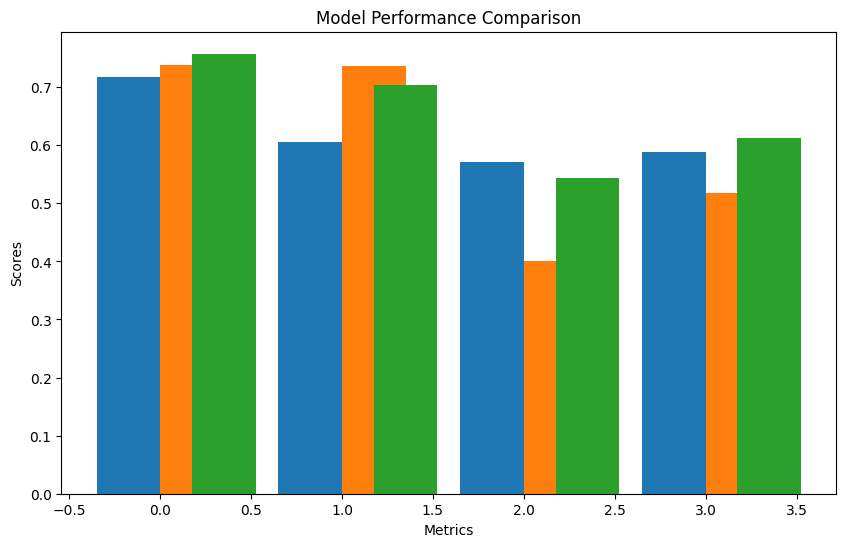

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, dt_scores, width, label='Decision Tree')
rects2 = ax.bar(x + width/2, knn_scores, width, label='KNN')
rects3 = ax.bar(x + width, nb_scores, width, label='Naive Bayes')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')